In [1]:
# set up Python environment: numpy for numerical routines, and matplotlib for plotting
import numpy as np
import matplotlib.pyplot as plt
# display plots in this notebook
%matplotlib inline

# set display defaults
plt.rcParams['figure.figsize'] = (10, 10)        # large images
plt.rcParams['image.interpolation'] = 'nearest'  # don't interpolate: show square pixels
plt.rcParams['image.cmap'] = 'gray'  # use grayscale output rather than a (potentially misleading) color heatmap

In [2]:
# The caffe module needs to be on the Python path;
#  we'll add it here explicitly.
import sys
caffe_root = '/home/yeshaokai/caffe-admm-clustering/'  # this file should be run from {caffe_root}/examples (otherwise change this line)
sys.path.insert(0, caffe_root + 'python')

import caffe
# If you get "No module named _caffe", either you have not built pycaffe or you have the wrong path.

In [3]:
caffe.set_mode_gpu()

model_def ='./lenet.prototxt'
model_weights = './lenet_clustering_retrain_iter_36000.caffemodel'
#model_weights = caffe_root + 'examples/mnist/lenet_admm_lr01.caffemodel'
#model_weights = caffe_root + 'examples/mnist/lenet_admm_lr001.caffemodel'
#model_weights = caffe_root + 'examples/mnist/lenet_admm_lr0001.caffemodel'

net = caffe.Net(model_def,      # defines the structure of the model
                model_weights,  # contains the trained weights
                caffe.TEST)     # use test mode (e.g., don't perform dropout)

In [4]:
# for each layer, show the output shape
for layer_name, blob in net.blobs.iteritems():
    print layer_name + '\t' + str(blob.data.shape)

data	(64, 1, 28, 28)
conv1	(64, 20, 24, 24)
pool1	(64, 20, 12, 12)
conv2	(64, 50, 8, 8)
pool2	(64, 50, 4, 4)
ip1	(64, 500)
ip2	(64, 10)
prob	(64, 10)


In [5]:
for layer_name, param in net.params.iteritems():
    print layer_name + '\t' + str(param[0].data.shape), str(param[1].data.shape)

conv1	(20, 1, 5, 5) (20,)
conv2	(50, 20, 5, 5) (50,)
ip1	(500, 800) (500,)
ip2	(10, 500) (10,)


In [6]:
def vis_square(data):
    """Take an array of shape (n, height, width) or (n, height, width, 3)
       and visualize each (height, width) thing in a grid of size approx. sqrt(n) by sqrt(n)"""
    
    # normalize data for display
    data = (data - data.min()) / (data.max() - data.min())
    
    # force the number of filters to be square
    n = int(np.ceil(np.sqrt(data.shape[0])))
    padding = (((0, n ** 2 - data.shape[0]),
               (0, 1), (0, 1))                 # add some space between filters
               + ((0, 0),) * (data.ndim - 3))  # don't pad the last dimension (if there is one)
    data = np.pad(data, padding, mode='constant', constant_values=1)  # pad with ones (white)
    
    # tile the filters into an image
    data = data.reshape((n, n) + data.shape[1:]).transpose((0, 2, 1, 3) + tuple(range(4, data.ndim + 1)))
    data = data.reshape((n * data.shape[1], n * data.shape[3]) + data.shape[4:])
    
    plt.imshow(data); plt.axis('off')

In [7]:
# the parameters are a list of [weights, biases]
filters = net.params['conv1'][0].data
#vis_square(filters.transpose(0, 2, 3, 1))

In [8]:
print filters.transpose(0, 2, 3, 1).shape

(20, 5, 5, 1)


Text(0,0.5,'Count')

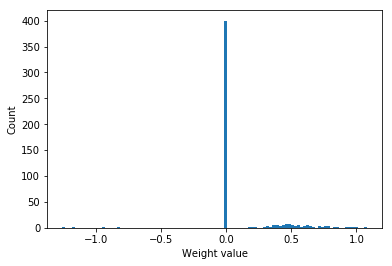

In [9]:
feat = net.params['conv1'][0].data
#plt.subplot(2, 1, 1)
#plt.plot(feat.flat)
#plt.subplot(2, 1, 2)
_ = plt.hist(feat.flat, bins=100)
plt.xlabel('Weight value')
plt.ylabel('Count')

Text(0,0.5,'Count')

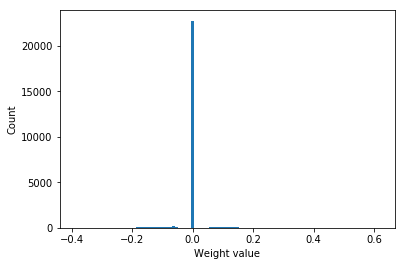

In [10]:
feat = net.params['conv2'][0].data
#plt.subplot(2, 1, 1)
#plt.plot(feat.flat)
#plt.subplot(2, 1, 2)
_ = plt.hist(feat.flat, bins=100)
plt.xlabel('Weight value')
plt.ylabel('Count')

Text(0,0.5,'Count')

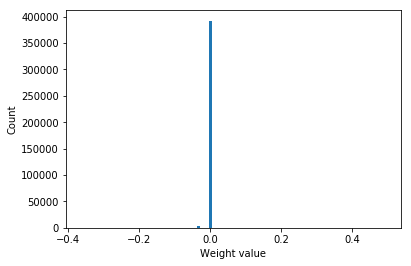

In [11]:
feat = net.params['ip1'][0].data
#plt.subplot(2, 1, 1)
#plt.plot(feat.flat)
#plt.subplot(2, 1, 2)
_ = plt.hist(feat.flat, bins=100)
plt.xlabel('Weight value')
plt.ylabel('Count')

Text(0,0.5,'Count')

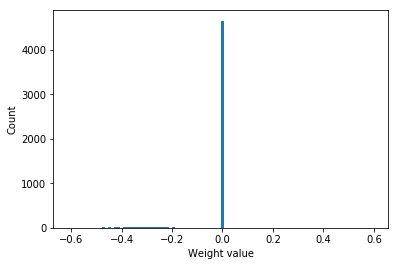

In [12]:
feat = net.params['ip2'][0].data
#plt.subplot(2, 1, 1)
#plt.plot(feat.flat)
#plt.subplot(2, 1, 2)
_ = plt.hist(feat.flat, bins=100)
plt.xlabel('Weight value')
plt.ylabel('Count')

## Weights Before Retrain, after admm

In [13]:
model_def = './lenet.prototxt'
model_weights ='./lenet_admm_clustering_iter_120000.caffemodel'

net = caffe.Net(model_def,      # defines the structure of the model
                model_weights,  # contains the trained weights
                caffe.TEST)     # use test mode (e.g., don't perform dropout)

Text(0,0.5,'Count')

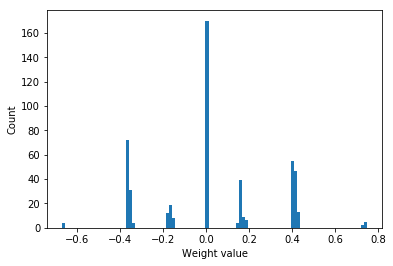

In [14]:
feat = net.params['conv1'][0].data
#plt.subplot(2, 1, 1)
#plt.plot(feat.flat)
#plt.subplot(2, 1, 2)
_ = plt.hist(feat.flat, bins=100)
plt.xlabel('Weight value')
plt.ylabel('Count')

Text(0,0.5,'Count')

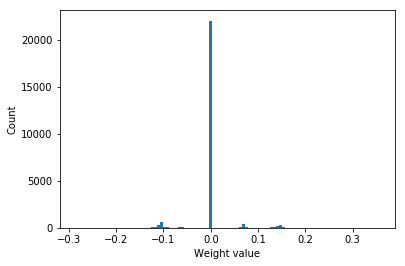

In [15]:
feat = net.params['conv2'][0].data
#plt.subplot(2, 1, 1)
#plt.plot(feat.flat)
#plt.subplot(2, 1, 2)
_ = plt.hist(feat.flat, bins=100)
plt.xlabel('Weight value')
plt.ylabel('Count')

Text(0,0.5,'Count')

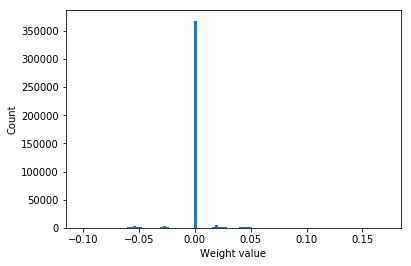

In [16]:
feat = net.params['ip1'][0].data
#plt.subplot(2, 1, 1)
#plt.plot(feat.flat)
#plt.subplot(2, 1, 2)
_ = plt.hist(feat.flat, bins=100)
plt.xlabel('Weight value')
plt.ylabel('Count')

Text(0,0.5,'Count')

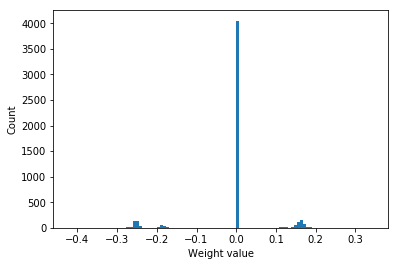

In [17]:
feat = net.params['ip2'][0].data
#plt.subplot(2, 1, 1)
#plt.plot(feat.flat)
#plt.subplot(2, 1, 2)
_ = plt.hist(feat.flat, bins=100)
plt.xlabel('Weight value')
plt.ylabel('Count')

In [18]:
caffe.set_mode_gpu()

model_def = './lenet.prototxt'
model_weights = './lenet_pruning_iter_50000.caffemodel'
#model_weights = caffe_root + 'examples/mnist/lenet_admm_lr01.caffemodel'
#model_weights = caffe_root + 'examples/mnist/lenet_admm_lr001.caffemodel'
#model_weights = caffe_root + 'examples/mnist/lenet_admm_lr0001.caffemodel'

net = caffe.Net(model_def,      # defines the structure of the model
                model_weights,  # contains the trained weights
                caffe.TEST)     # use test mode (e.g., don't perform dropout)

Text(0,0.5,'Count')

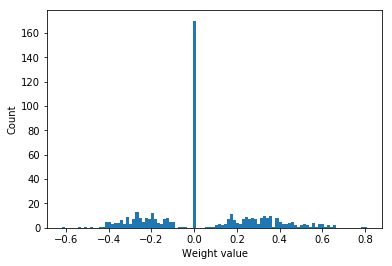

In [19]:
feat = net.params['conv1'][0].data
#plt.subplot(2, 1, 1)
#plt.plot(feat.flat)
#plt.subplot(2, 1, 2)
_ = plt.hist(feat.flat, bins=100)
plt.xlabel('Weight value')
plt.ylabel('Count')

Text(0,0.5,'Count')

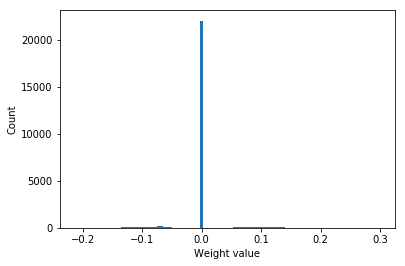

In [20]:
feat = net.params['conv2'][0].data
#plt.subplot(2, 1, 1)
#plt.plot(feat.flat)
#plt.subplot(2, 1, 2)
_ = plt.hist(feat.flat, bins=100)
plt.xlabel('Weight value')
plt.ylabel('Count')

Text(0,0.5,'Count')

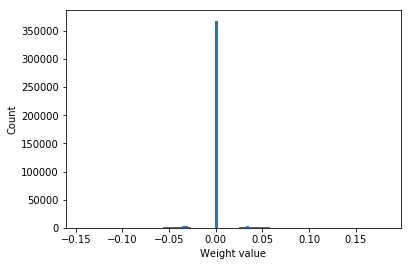

In [21]:
feat = net.params['ip1'][0].data
#plt.subplot(2, 1, 1)
#plt.plot(feat.flat)
#plt.subplot(2, 1, 2)
_ = plt.hist(feat.flat, bins=100)
plt.xlabel('Weight value')
plt.ylabel('Count')

Text(0,0.5,'Count')

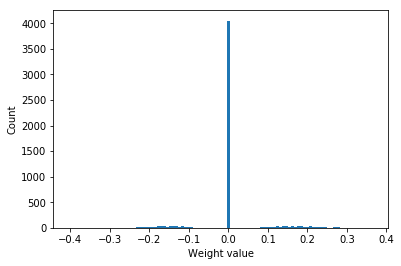

In [22]:
feat = net.params['ip2'][0].data
#plt.subplot(2, 1, 1)
#plt.plot(feat.flat)
#plt.subplot(2, 1, 2)
_ = plt.hist(feat.flat, bins=100)
plt.xlabel('Weight value')
plt.ylabel('Count')

In [23]:
for layer_name, param in net.params.iteritems():
    weights = param[0].data
    print layer_name + '\t' + str(len(weights.flat)) + '\t' + str(np.sum(weights != 0)) + '\t' + str(100.0 - np.sum(weights != 0)*100.0/len(weights.flat)) + '%'

conv1	500	330	34.0%
conv2	25000	3000	88.0%
ip1	400000	32000	92.0%
ip2	5000	950	81.0%
